# Wine Dataset

## Problem Statements

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix,roc_curve, multilabel_confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Gathering

In [2]:
df = pd.read_csv("wine.csv")
df

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0       1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1       1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2       1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3       1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4       1    13.24        2.59  2.87  21.0  118     2.80        2.69   
..    ...      ...         ...   ...   ...  ...      ...         ...   
173     3    13.71        5.65  2.45  20.5   95     1.68        0.61   
174     3    13.40        3.91  2.48  23.0  102     1.80        0.75   
175     3    13.27        4.28  2.26  20.0  120     1.59        0.69   
176     3    13.17        2.59  2.37  20.0  120     1.65        0.68   
177     3    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29       5.64  1.04  3.92     1065  
1                    0.26     1.28       4.38  1.05  3.40     1050  
2                    0.30     2.81       5.68  1.03  3.17     1185  
3                    0.24     2.18       7.80  0.86  3.45     1480  
4                    0.39     1.82       4.32  1.04  2.93      735  
..                    ...      ...        ...   ...   ...      ...  
173                  0.52     1.06       7.70  0.64  1.74      740  
174                  0.43     1.41       7.30  0.70  1.56      750  
175                  0.43     1.35      10.20  0.59  1.56      835  
176                  0.53     1.46       9.30  0.60  1.62      840  
177                  0.56     1.35       9.20  0.61  1.60      560  

[178 rows x 14 columns]

# Feature Engineering (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [5]:
df.corr()

Wine   Alcohol  Malic.acid       Ash       Acl  \
Wine                  1.000000 -0.328222    0.437776 -0.049643  0.517859   
Alcohol              -0.328222  1.000000    0.094397  0.211545 -0.310235   
Malic.acid            0.437776  0.094397    1.000000  0.164045  0.288500   
Ash                  -0.049643  0.211545    0.164045  1.000000  0.443367   
Acl                   0.517859 -0.310235    0.288500  0.443367  1.000000   
Mg                   -0.209179  0.270798   -0.054575  0.286587 -0.083333   
Phenols              -0.719163  0.289101   -0.335167  0.128980 -0.321113   
Flavanoids           -0.847498  0.236815   -0.411007  0.115077 -0.351370   
Nonflavanoid.phenols  0.489109 -0.155929    0.292977  0.186230  0.361922   
Proanth              -0.499130  0.136698   -0.220746  0.009652 -0.197327   
Color.int             0.265668  0.546364    0.248985  0.258887  0.018732   
Hue                  -0.617369 -0.071747   -0.561296 -0.074667 -0.273955   
OD                   -0.788230  0.072343   -0.368710  0.003911 -0.276769   
Proline              -0.633717  0.643720   -0.192011  0.223626 -0.440597   

                            Mg   Phenols  Flavanoids  Nonflavanoid.phenols  \
Wine                 -0.209179 -0.719163   -0.847498              0.489109   
Alcohol               0.270798  0.289101    0.236815             -0.155929   
Malic.acid           -0.054575 -0.335167   -0.411007              0.292977   
Ash                   0.286587  0.128980    0.115077              0.186230   
Acl                  -0.083333 -0.321113   -0.351370              0.361922   
Mg                    1.000000  0.214401    0.195784             -0.256294   
Phenols               0.214401  1.000000    0.864564             -0.449935   
Flavanoids            0.195784  0.864564    1.000000             -0.537900   
Nonflavanoid.phenols -0.256294 -0.449935   -0.537900              1.000000   
Proanth               0.236441  0.612413    0.652692             -0.365845   
Color.int             0.199950 -0.055136   -0.172379              0.139057   
Hue                   0.055398  0.433681    0.543479             -0.262640   
OD                    0.066004  0.699949    0.787194             -0.503270   
Proline               0.393351  0.498115    0.494193             -0.311385   

                       Proanth  Color.int       Hue        OD   Proline  
Wine                 -0.499130   0.265668 -0.617369 -0.788230 -0.633717  
Alcohol               0.136698   0.546364 -0.071747  0.072343  0.643720  
Malic.acid           -0.220746   0.248985 -0.561296 -0.368710 -0.192011  
Ash                   0.009652   0.258887 -0.074667  0.003911  0.223626  
Acl                  -0.197327   0.018732 -0.273955 -0.276769 -0.440597  
Mg                    0.236441   0.199950  0.055398  0.066004  0.393351  
Phenols               0.612413  -0.055136  0.433681  0.699949  0.498115  
Flavanoids            0.652692  -0.172379  0.543479  0.787194  0.494193  
Nonflavanoid.phenols -0.365845   0.139057 -0.262640 -0.503270 -0.311385  
Proanth               1.000000  -0.025250  0.295544  0.519067  0.330417  
Color.int            -0.025250   1.000000 -0.521813 -0.428815  0.316100  
Hue                   0.295544  -0.521813  1.000000  0.565468  0.236183  
OD                    0.519067  -0.428815  0.565468  1.000000  0.312761  
Proline               0.330417   0.316100  0.236183  0.312761  1.000000

<AxesSubplot:>

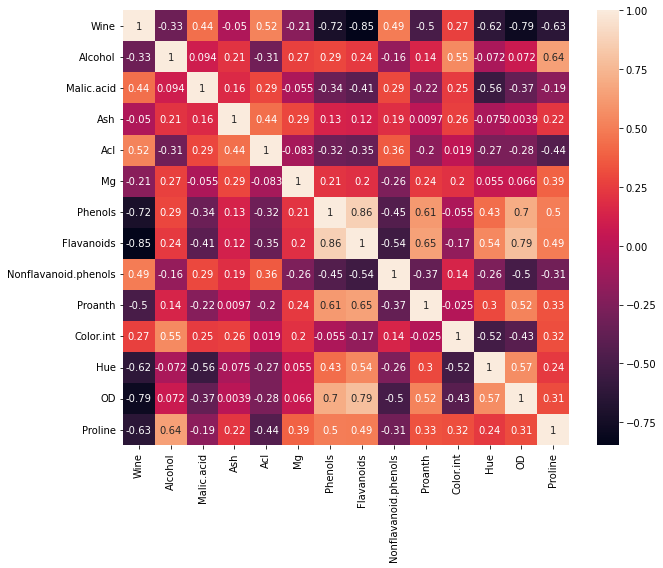

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True)

## Target Column

In [7]:
df['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

<AxesSubplot:xlabel='Wine', ylabel='count'>

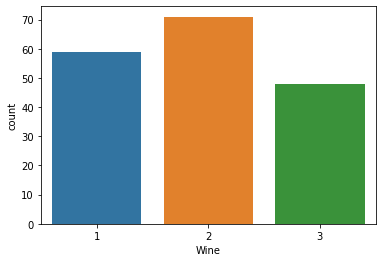

In [8]:
sns.countplot(x=df['Wine'])

<AxesSubplot:>

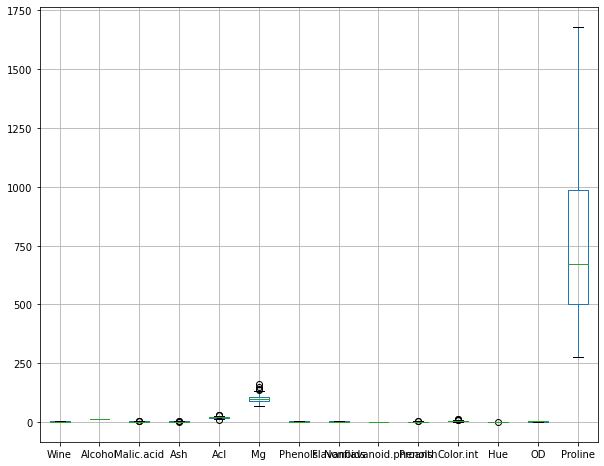

In [9]:
plt.figure(figsize=(10,8))
df.boxplot()

### 1. Alcohol

<AxesSubplot:>

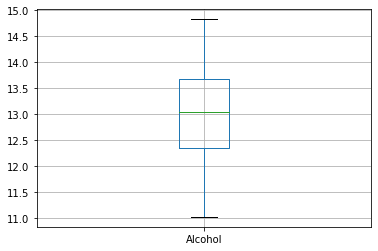

In [10]:
df[['Alcohol']].boxplot()

### 2. Malic.acid

<AxesSubplot:>

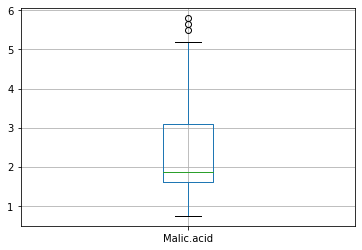

In [11]:
df[['Malic.acid']].boxplot()

In [12]:
# outliers retriving and handling

for i in df["Malic.acid"]:
    q1 = df["Malic.acid"].quantile(0.25)
    q3 = df["Malic.acid"].quantile(0.75)
    IQR = q3 - q1
    upper_tail = q3 + 1.5*IQR
    lower_tail = q1 - 1.5*IQR
    if (i < lower_tail) or (i > upper_tail):
        df["Malic.acid"] = df["Malic.acid"].replace(i,np.mean(df["Malic.acid"]))
    

<AxesSubplot:>

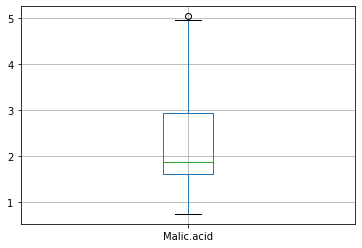

In [13]:
df[['Malic.acid']].boxplot()

In [14]:
# outliers retriving and handling

for i in df["Malic.acid"]:
    q1 = df["Malic.acid"].quantile(0.25)
    q3 = df["Malic.acid"].quantile(0.75)
    IQR = q3 - q1
    upper_tail = q3 + 1.5*IQR
    lower_tail = q1 - 1.5*IQR
    if (i < lower_tail) or (i > upper_tail):
        df["Malic.acid"] = df["Malic.acid"].replace(i,np.median(df["Malic.acid"]))

<AxesSubplot:>

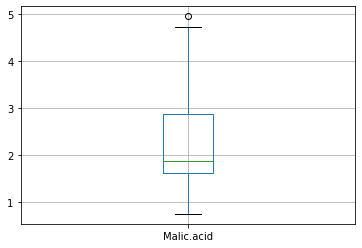

In [15]:
df[['Malic.acid']].boxplot()

### 3. Ash

<AxesSubplot:>

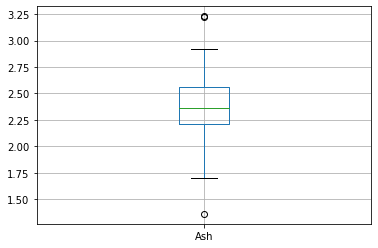

In [16]:
df[['Ash']].boxplot()

In [17]:
# outliers retriving and handling

for i in df["Ash"]:
    q1 = df["Ash"].quantile(0.25)
    q3 = df["Ash"].quantile(0.75)
    IQR = q3 - q1
    upper_tail = q3 + 1.5*IQR
    lower_tail = q1 - 1.5*IQR
    if (i < lower_tail) or (i > upper_tail):
        df["Ash"] = df["Ash"].replace(i,np.mean(df["Ash"]))
    

<AxesSubplot:>

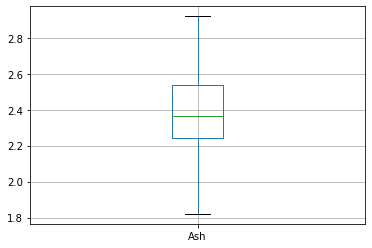

In [18]:
df[['Ash']].boxplot()

### 4. Acl

<AxesSubplot:>

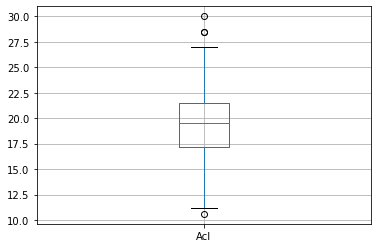

In [19]:
df[['Acl']].boxplot()

In [20]:
# outliers retriving and handling

for i in df["Acl"]:
    q1 = df["Acl"].quantile(0.25)
    q3 = df["Acl"].quantile(0.75)
    IQR = q3 - q1
    upper_tail = q3 + 1.5*IQR
    lower_tail = q1 - 1.5*IQR
    if (i < lower_tail) or (i > upper_tail):
        df["Acl"] = df["Acl"].replace(i,np.mean(df["Acl"]))

<AxesSubplot:>

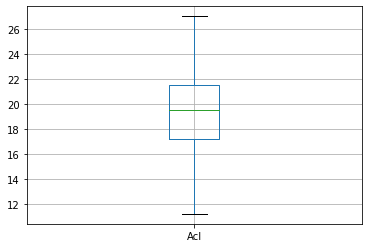

In [21]:
df[['Acl']].boxplot()

### 5. Mg

<AxesSubplot:>

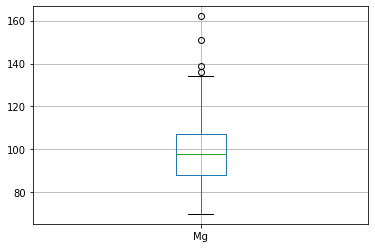

In [22]:
df[['Mg']].boxplot()

In [23]:
# outliers retriving and handling

for i in df["Mg"]:
    q1 = df["Mg"].quantile(0.25)
    q3 = df["Mg"].quantile(0.75)
    IQR = q3 - q1
    upper_tail = q3 + 1.5*IQR
    lower_tail = q1 - 1.5*IQR
    if (i < lower_tail) or (i > upper_tail):
        df["Mg"] = df["Mg"].replace(i,np.mean(df["Mg"]))
    

<AxesSubplot:>

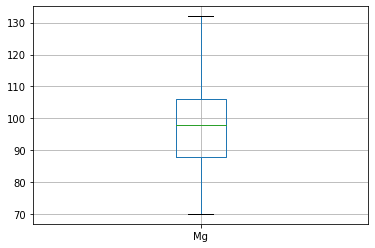

In [24]:
df[['Mg']].boxplot()

### 6. Phenols

<AxesSubplot:>

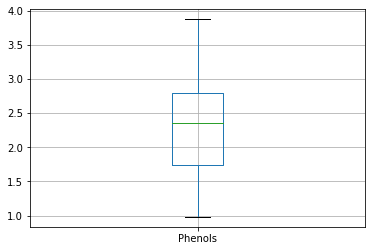

In [25]:
df[['Phenols']].boxplot()

### 7. Flavanoids

<AxesSubplot:>

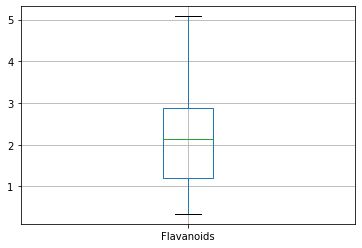

In [26]:
df[['Flavanoids']].boxplot()

### 8. Nonflavanoid.phenols

<AxesSubplot:>

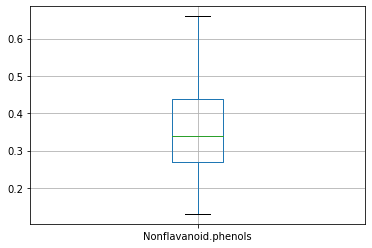

In [27]:
df[['Nonflavanoid.phenols']].boxplot()

### 9. Proanth

<AxesSubplot:>

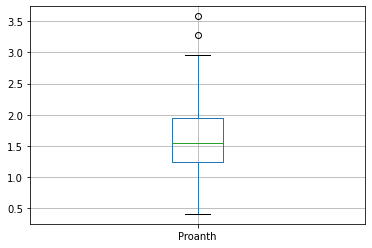

In [28]:
df[['Proanth']].boxplot()

In [29]:
# outliers retriving and handling

for i in df["Proanth"]:
    q1 = df["Proanth"].quantile(0.25)
    q3 = df["Proanth"].quantile(0.75)
    IQR = q3 - q1
    upper_tail = q3 + 1.5*IQR
    lower_tail = q1 - 1.5*IQR
    if (i < lower_tail) or (i > upper_tail):
        df["Proanth"] = df["Proanth"].replace(i,np.mean(df["Proanth"]))
    

<AxesSubplot:>

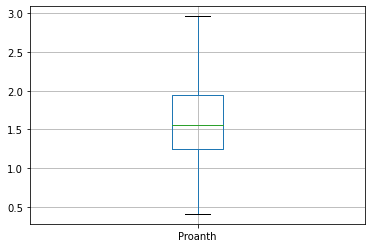

In [30]:
df[['Proanth']].boxplot()

### 10. Color.int

<AxesSubplot:>

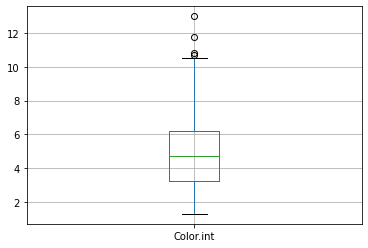

In [31]:
df[['Color.int']].boxplot()

In [32]:
# outliers retriving and handling

for i in df["Color.int"]:
    q1 = df["Color.int"].quantile(0.25)
    q3 = df["Color.int"].quantile(0.75)
    IQR = q3 - q1
    upper_tail = q3 + 1.5*IQR
    lower_tail = q1 - 1.5*IQR
    if (i < lower_tail) or (i > upper_tail):
        df["Color.int"] = df["Color.int"].replace(i,np.mean(df["Color.int"]))
    

<AxesSubplot:>

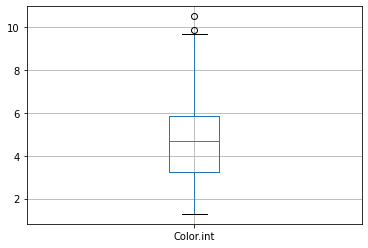

In [33]:
df[['Color.int']].boxplot()

In [34]:
# outliers retriving and handling

for i in df["Color.int"]:
    q1 = df["Color.int"].quantile(0.25)
    q3 = df["Color.int"].quantile(0.75)
    IQR = q3 - q1
    upper_tail = q3 + 1.5*IQR
    lower_tail = q1 - 1.5*IQR
    if (i < lower_tail) or (i > upper_tail):
        df["Color.int"] = df["Color.int"].replace(i,np.median(df["Color.int"]))

<AxesSubplot:>

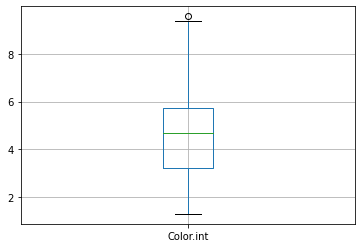

In [35]:
df[['Color.int']].boxplot()

### 11. Hue

<AxesSubplot:>

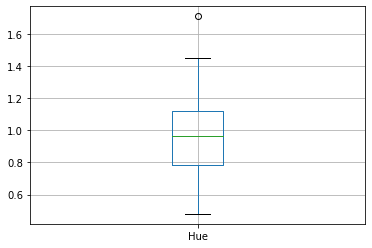

In [36]:
df[['Hue']].boxplot()

In [37]:
# outliers retriving and handling

for i in df["Hue"]:
    q1 = df["Hue"].quantile(0.25)
    q3 = df["Hue"].quantile(0.75)
    IQR = q3 - q1
    upper_tail = q3 + 1.5*IQR
    lower_tail = q1 - 1.5*IQR
    if (i < lower_tail) or (i > upper_tail):
        df["Hue"] = df["Hue"].replace(i,np.mean(df["Hue"]))
    

<AxesSubplot:>

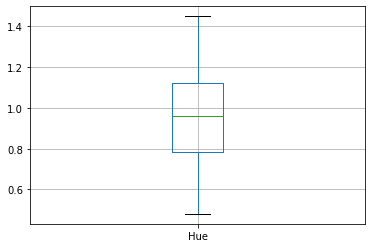

In [38]:
df[['Hue']].boxplot()

### 12. OD

<AxesSubplot:>

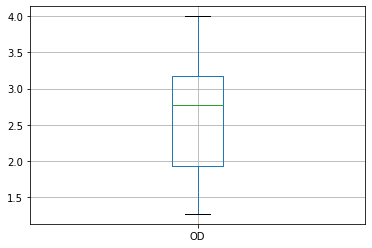

In [39]:
df[['OD']].boxplot()

### 13. Proline

<AxesSubplot:>

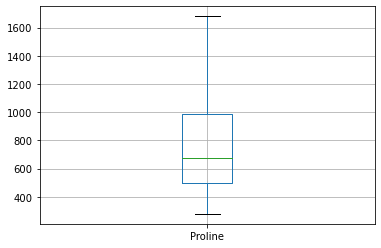

In [40]:
df[['Proline']].boxplot()

## Feature Selection

In [41]:
df = df.select_dtypes(exclude=object)
x = df.drop('Wine',axis = 1)
y = df['Wine']

In [42]:
x

Alcohol  Malic.acid   Ash   Acl     Mg  Phenols  Flavanoids  \
0      14.23    1.710000  2.43  15.6  127.0     2.80        3.06   
1      13.20    1.780000  2.14  11.2  100.0     2.65        2.76   
2      13.16    2.360000  2.67  18.6  101.0     2.80        3.24   
3      14.37    1.950000  2.50  16.8  113.0     3.85        3.49   
4      13.24    2.590000  2.87  21.0  118.0     2.80        2.69   
..       ...         ...   ...   ...    ...      ...         ...   
173    13.71    2.282709  2.45  20.5   95.0     1.68        0.61   
174    13.40    3.910000  2.48  23.0  102.0     1.80        0.75   
175    13.27    4.280000  2.26  20.0  120.0     1.59        0.69   
176    13.17    2.590000  2.37  20.0  120.0     1.65        0.68   
177    14.13    4.100000  2.74  24.5   96.0     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29   5.640000  1.04  3.92     1065  
1                    0.26     1.28   4.380000  1.05  3.40     1050  
2                    0.30     2.81   5.680000  1.03  3.17     1185  
3                    0.24     2.18   7.800000  0.86  3.45     1480  
4                    0.39     1.82   4.320000  1.04  2.93      735  
..                    ...      ...        ...   ...   ...      ...  
173                  0.52     1.06   7.700000  0.64  1.74      740  
174                  0.43     1.41   7.300000  0.70  1.56      750  
175                  0.43     1.35   4.880723  0.59  1.56      835  
176                  0.53     1.46   9.300000  0.60  1.62      840  
177                  0.56     1.35   9.200000  0.61  1.60      560  

[178 rows x 13 columns]

In [43]:
x.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [44]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [45]:
y.value_counts().to_dict()

{2: 71, 1: 59, 3: 48}

## Train Test Split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)
x_train

Alcohol  Malic.acid   Ash   Acl          Mg  Phenols  Flavanoids  \
104    12.51        1.73  1.98  20.5   85.000000     2.20        1.92   
50     13.05        1.73  2.04  12.4   92.000000     2.72        3.27   
42     13.88        1.89  2.59  15.0  101.000000     3.25        3.56   
102    12.34        2.45  2.46  21.0   98.000000     2.56        2.11   
48     14.10        2.02  2.40  18.8  103.000000     2.75        2.92   
..       ...         ...   ...   ...         ...      ...         ...   
109    11.61        1.35  2.70  20.0   94.000000     2.74        2.92   
95     12.47        1.52  2.20  19.0   99.024869     2.50        2.27   
60     12.33        1.10  2.28  16.0  101.000000     2.05        1.09   
16     14.30        1.92  2.72  20.0  120.000000     2.80        3.14   
165    13.73        4.36  2.26  22.5   88.000000     1.28        0.47   

     Nonflavanoid.phenols   Proanth  Color.int   Hue    OD  Proline  
104                  0.32  1.480000       2.94  1.04  3.57      672  
50                   0.17  2.910000       7.20  1.12  2.91     1150  
42                   0.17  1.700000       5.43  0.88  3.56     1095  
102                  0.34  1.310000       2.80  0.80  3.38      438  
48                   0.32  2.380000       6.20  1.07  2.75     1060  
..                    ...       ...        ...   ...   ...      ...  
109                  0.29  2.490000       2.65  0.96  3.26      680  
95                   0.32  1.590899       2.60  1.16  2.63      937  
60                   0.63  0.410000       3.27  1.25  1.67      680  
16                   0.33  1.970000       6.20  1.07  2.65     1280  
165                  0.52  1.150000       6.62  0.78  1.75      520  

[133 rows x 13 columns]

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 13)
(45, 13)
(133,)
(45,)


## Logstic Regression Algorithm

## Model Traning

In [48]:
logistic_model = LogisticRegression(multi_class= 'ovr')
logistic_model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

## Evaluation

In [49]:
# Testing Data Evaluation
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[14  1  0]
 [ 2 16  0]
 [ 0  0 12]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[28  2]
  [ 1 14]]

 [[26  1]
  [ 2 16]]

 [[33  0]
  [ 0 12]]]
****************************************************************************************
Accuracy : 0.9333333333333333
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.88      0.93      0.90        15
           2       0.94      0.89      0.91        18
           3       1.00      1.00      1.00        12

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [50]:
# Training Data Evaluation
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[42  2  0]
 [ 1 49  3]
 [ 0  0 36]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[88  1]
  [ 2 42]]

 [[78  2]
  [ 4 49]]

 [[94  3]
  [ 0 36]]]
****************************************************************************************
Accuracy : 0.9548872180451128
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.98      0.95      0.97        44
           2       0.96      0.92      0.94        53
           3       0.92      1.00      0.96        36

    accuracy                           0.95       133
   macro avg       0.95      0.96      0.96       133
weighted avg       0.96      0.95      0.95       133



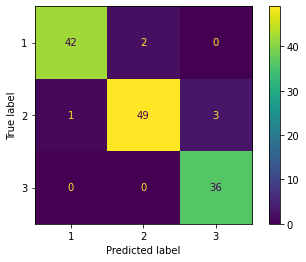

In [51]:
plot_confusion_matrix(logistic_model,x_train, y_train)

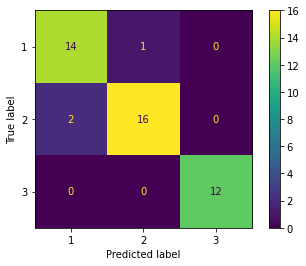

In [52]:
plot_confusion_matrix(logistic_model,x_test, y_test)

# KNN Algorithm

## Model Training 

In [53]:
knn_clf= KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

## Evaluation

In [54]:
# Testing Data Evaluation
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[13  0  2]
 [ 2 11  5]
 [ 2  3  7]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[26  4]
  [ 2 13]]

 [[24  3]
  [ 7 11]]

 [[26  7]
  [ 5  7]]]
****************************************************************************************
Accuracy : 0.6888888888888889
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.79      0.61      0.69        18
           3       0.50      0.58      0.54        12

    accuracy                           0.69        45
   macro avg       0.68      0.69      0.68        45
weighted avg       0.70      0.69      0.69        45



In [55]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[42  1  1]
 [ 1 43  9]
 [ 2 10 24]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[86  3]
  [ 2 42]]

 [[69 11]
  [10 43]]

 [[87 10]
  [12 24]]]
****************************************************************************************
Accuracy : 0.8195488721804511
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.93      0.95      0.94        44
           2       0.80      0.81      0.80        53
           3       0.71      0.67      0.69        36

    accuracy                           0.82       133
   macro avg       0.81      0.81      0.81       133
weighted avg       0.82      0.82      0.82       133



### Feature Engineering for KNN

In [56]:
x_df = df.drop('Wine',axis = 1)
x_df.head()

Alcohol  Malic.acid   Ash   Acl     Mg  Phenols  Flavanoids  \
0    14.23        1.71  2.43  15.6  127.0     2.80        3.06   
1    13.20        1.78  2.14  11.2  100.0     2.65        2.76   
2    13.16        2.36  2.67  18.6  101.0     2.80        3.24   
3    14.37        1.95  2.50  16.8  113.0     3.85        3.49   
4    13.24        2.59  2.87  21.0  118.0     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735

In [57]:
normal_scaler = MinMaxScaler()
array = normal_scaler.fit_transform(x_df)
x_normal_df = pd.DataFrame(array,columns=x_df.columns)
# x_normal_df

In [58]:
# std_scaler = StandardScaler()
# array = std_scaler.fit_transform(x_df)
# x_std_df = pd.DataFrame(array,columns=x_df.columns)
# #x_std_df.head()

### Feature Selection for KNN

In [59]:
x = df.drop('Wine',axis = 1)
y = df['Wine']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=24, stratify=y)

In [60]:
# Normalization
x1 = x_normal_df.copy()
y1 = df['Wine']

x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.25, random_state=24, stratify=y)
# x_test

In [61]:
# # Standardization
# x1 = x_std_df.copy()
# y1 = df['Wine']

# x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.25, random_state=24, stratify=y)
# # x_test

## Model Training After Scaling

In [62]:
knn_clf_Norm = KNeighborsClassifier() # Euclidean Distance, k = 5
knn_clf_Norm.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
# Testing Data Evaluation
y_pred = knn_clf_Norm.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[15  0  0]
 [ 1 17  0]
 [ 0  0 12]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[29  1]
  [ 0 15]]

 [[27  0]
  [ 1 17]]

 [[33  0]
  [ 0 12]]]
****************************************************************************************
Accuracy : 0.9777777777777777
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [64]:
# Training Data Evaluation
y_pred_train = knn_clf_Norm.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[44  0  0]
 [ 2 49  2]
 [ 0  0 36]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[87  2]
  [ 0 44]]

 [[80  0]
  [ 4 49]]

 [[95  2]
  [ 0 36]]]
****************************************************************************************
Accuracy : 0.9699248120300752
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        44
           2       1.00      0.92      0.96        53
           3       0.95      1.00      0.97        36

    accuracy                           0.97       133
   macro avg       0.97      0.97      0.97       133
weighted avg       0.97      0.97      0.97       133



# Decision Tree Algorithm

In [65]:
x = df.drop('Wine',axis = 1)
y = df['Wine']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)

In [66]:
dt_clf =DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

## Evaluation

In [67]:
# Testing Data Evaluation
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[13  2  0]
 [ 2 14  2]
 [ 0  0 12]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[28  2]
  [ 2 13]]

 [[25  2]
  [ 4 14]]

 [[31  2]
  [ 0 12]]]
****************************************************************************************
Accuracy : 0.8666666666666667
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.88      0.78      0.82        18
           3       0.86      1.00      0.92        12

    accuracy                           0.87        45
   macro avg       0.87      0.88      0.87        45
weighted avg       0.87      0.87      0.86        45



In [68]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[44  0  0]
 [ 0 53  0]
 [ 0  0 36]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[89  0]
  [ 0 44]]

 [[80  0]
  [ 0 53]]

 [[97  0]
  [ 0 36]]]
****************************************************************************************
Accuracy : 1.0
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        36

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



In [69]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf, feature_names=x.columns, class_names=['1','2','3'],filled=True)
plt.savefig('Decision_Tree_Without_HYP.png')

## Hyperparameter Tuning

In [70]:
dt_clf = DecisionTreeClassifier()
hyperparameters ={ "criterion" :['gini','entropy'],
     'max_depth': np.arange(3,8),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}


gscv_dt_clf = GridSearchCV(dt_clf,hyperparameters, cv = 5)
gscv_dt_clf.fit(x_train, y_train)
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=3)

In [71]:
dt_clf_HP = gscv_dt_clf.best_estimator_
dt_clf_HP.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=3)

## Evaluation

In [72]:
# Testing Data Evaluation
y_pred = dt_clf_HP.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[15  0  0]
 [ 2 15  1]
 [ 0  3  9]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[28  2]
  [ 0 15]]

 [[24  3]
  [ 3 15]]

 [[32  1]
  [ 3  9]]]
****************************************************************************************
Accuracy : 0.8666666666666667
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.88      1.00      0.94        15
           2       0.83      0.83      0.83        18
           3       0.90      0.75      0.82        12

    accuracy                           0.87        45
   macro avg       0.87      0.86      0.86        45
weighted avg       0.87      0.87      0.86        45



In [73]:
# Training Data Evaluation
y_pred_train = dt_clf_HP.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[44  0  0]
 [ 1 52  0]
 [ 0  1 35]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[88  1]
  [ 0 44]]

 [[79  1]
  [ 1 52]]

 [[97  0]
  [ 1 35]]]
****************************************************************************************
Accuracy : 0.9849624060150376
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.98      1.00      0.99        44
           2       0.98      0.98      0.98        53
           3       1.00      0.97      0.99        36

    accuracy                           0.98       133
   macro avg       0.99      0.98      0.99       133
weighted avg       0.99      0.98      0.98       133



In [74]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf_HP, feature_names=x.columns, class_names=['1','2','3'],filled=True)
plt.savefig('Decision_Tree_With_HYP.png')

# Random Forest Algorithm

In [75]:
x = df.drop('Wine',axis = 1)
y = df['Wine']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=29,stratify=y)

In [76]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

## Evaluation

In [77]:
# Testing Data Evaluation
y_pred = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[15  0  0]
 [ 1 17  0]
 [ 0  0 12]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[29  1]
  [ 0 15]]

 [[27  0]
  [ 1 17]]

 [[33  0]
  [ 0 12]]]
****************************************************************************************
Accuracy : 0.9777777777777777
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [78]:
# Training Data Evaluation
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[44  0  0]
 [ 0 53  0]
 [ 0  0 36]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[89  0]
  [ 0 44]]

 [[80  0]
  [ 0 53]]

 [[97  0]
  [ 0 36]]]
****************************************************************************************
Accuracy : 1.0
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        36

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



## Hyperparameter Tuning

In [79]:
rf_clf = RandomForestClassifier()

hyperparameters = {
                "n_estimators" :np.arange(10,200),
                "criterion" : ['gini','entropy'],
                "max_depth" : np.arange(3, 8),
                "min_samples_split" : np.arange(4,20), 
                "min_samples_leaf" : np.arange(3,10),
                "oob_score" : [True],
                "random_state" : [11]
                    }

gscv_rf_model = RandomizedSearchCV(rf_clf,hyperparameters,cv = 7)
gscv_rf_model.fit(x_train, y_train)
gscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=17,
                       n_estimators=22, oob_score=True, random_state=11)

In [80]:
rf_clf_HP = gscv_rf_model.best_estimator_

rf_clf_HP.fit(x_train, y_train )

RandomForestClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=17,
                       n_estimators=22, oob_score=True, random_state=11)

## Evaluation

In [81]:
# Testing Data Evaluation
y_pred = rf_clf_HP.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[15  0  0]
 [ 1 17  0]
 [ 0  0 12]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[29  1]
  [ 0 15]]

 [[27  0]
  [ 1 17]]

 [[33  0]
  [ 0 12]]]
****************************************************************************************
Accuracy : 0.9777777777777777
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [82]:
# Training Data Evaluation
y_pred_train = rf_clf_HP.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*88)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_matrix)
print("*"*88)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print("*"*88)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[44  0  0]
 [ 0 52  1]
 [ 0  0 36]]
****************************************************************************************
MultiLabel Confusion Matrix :
 [[[89  0]
  [ 0 44]]

 [[80  0]
  [ 1 52]]

 [[96  1]
  [ 0 36]]]
****************************************************************************************
Accuracy : 0.9924812030075187
****************************************************************************************
Classification Report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       1.00      0.98      0.99        53
           3       0.97      1.00      0.99        36

    accuracy                           0.99       133
   macro avg       0.99      0.99      0.99       133
weighted avg       0.99      0.99      0.99       133



# Conclusion

In [83]:
def Compare_Accuracy(logistic_model, knn_clf_Norm, dt_clf_HP, rf_clf_HP):
    global accuracy_comp
    train_acc = []
    test_acc = []
    recall = []
    precision = []
    
    for i in [logistic_model, knn_clf_Norm, dt_clf_HP, rf_clf_HP]:
        y_pred_train=i.predict(x_train)
        train_acc.append(accuracy_score(y_train,y_pred_train))
        #precision.append(precision_score(y_train,y_pred_train))
        y_pred_test=i.predict(x_test)
        test_acc.append(accuracy_score(y_test,y_pred_test))
        #recall.append(recall_score(y_test,y_pred_test))
        
    accuracy_comp = pd.DataFrame({"test_acc":test_acc,
                               "train_acc":train_acc,
                               #"recall":recall,
                               #"precision":precision
                                 },
                                index=["logistic_model","knn_clf","dt_clf","rf_model"])
    return accuracy_comp

Compare_Accuracy(logistic_model, knn_clf_Norm, dt_clf_HP, rf_clf_HP)

test_acc  train_acc
logistic_model  0.933333   0.954887
knn_clf         0.333333   0.330827
dt_clf          0.866667   0.984962
rf_model        0.977778   0.992481

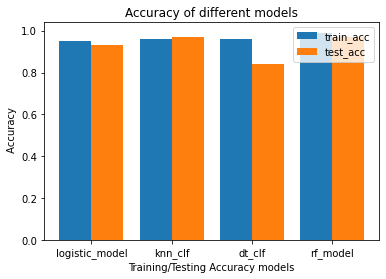

In [84]:
# import numpy as np 
# import matplotlib.pyplot as plt 
  
X = ["logistic_model","knn_clf","dt_clf","rf_model"]
train_acc = [0.95,0.96,0.96,0.99]
test_acc = [0.93,0.97,0.86,0.97]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, train_acc, 0.4, label = 'train_acc')
plt.bar(X_axis + 0.2, test_acc, 0.4, label = 'test_acc')
  
plt.xticks(X_axis, X)
plt.xlabel("Training/Testing Accuracy models")
plt.ylabel(" Accuracy")
plt.title("Accuracy of different models")
plt.legend()
plt.show()

# Rondom Forest Algorithm model is the best for Wine dataset

In [528]:
#7.Testing on Single Row
x.head(1).T

0
Alcohol                 14.23
Malic.acid               1.71
Ash                      2.43
Acl                     15.60
Mg                     127.00
Phenols                  2.80
Flavanoids               3.06
Nonflavanoid.phenols     0.28
Proanth                  2.29
Color.int                5.64
Hue                      1.04
OD                       3.92
Proline               1065.00

In [529]:
from sklearn.metrics import roc_curve

In [530]:
y_train

104    2
50     1
42     1
102    2
48     1
      ..
109    2
95     2
60     2
16     1
165    3
Name: Wine, Length: 133, dtype: int64

In [544]:
y_pred_prob = rf_clf_HP.predict_proba(x_train)
#y_pred_prob[:,1]
#fpr,tpr,thresh = roc_curve(y_train,y_pred_prob[:,1])
# tpr

In [545]:
#plt.plot(fpr,tpr)
#plt.xlabel("False Positive Rate (FPR)")
#plt.ylabel("True Positive Rate(TPR)")
#plt.title("Receiver Operating Characteristic Curve")

## Predict on single Row

In [546]:
x_test.iloc[0]

Alcohol                  12.79000
Malic.acid                2.67000
Ash                       2.48000
Acl                      22.00000
Mg                      112.00000
Phenols                   1.48000
Flavanoids                1.36000
Nonflavanoid.phenols      0.24000
Proanth                   1.26000
Color.int                 5.05809
Hue                       0.48000
OD                        1.47000
Proline                 480.00000
Name: 151, dtype: float64

In [547]:
x_test

Alcohol  Malic.acid   Ash        Acl          Mg  Phenols  Flavanoids  \
151    12.79        2.67  2.48  22.000000  112.000000     1.48        1.36   
175    13.27        4.28  2.26  20.000000  120.000000     1.59        0.69   
106    12.25        1.73  2.12  19.000000   80.000000     1.65        2.03   
172    14.16        2.51  2.48  20.000000   91.000000     1.68        0.70   
44     13.05        1.77  2.10  17.000000  107.000000     3.00        3.00   
46     14.38        3.59  2.28  16.000000  102.000000     3.25        3.17   
11     14.12        1.48  2.32  16.800000   95.000000     2.20        2.43   
131    12.88        2.99  2.40  20.000000  104.000000     1.30        1.22   
135    12.60        2.46  2.20  18.500000   94.000000     1.62        0.66   
32     13.68        1.83  2.36  17.200000  104.000000     2.42        2.69   
75     11.66        1.88  1.92  16.000000   97.000000     1.61        1.57   
139    12.84        2.96  2.61  24.000000  101.000000     2.32        0.60   
19     13.64        3.10  2.56  15.200000  116.000000     2.70        3.03   
74     11.96        1.09  2.30  21.000000  101.000000     3.38        2.14   
24     13.50        1.81  2.61  20.000000   96.000000     2.53        2.61   
170    12.20        3.03  2.32  19.000000   96.000000     1.25        0.49   
94     11.62        1.99  2.28  18.000000   98.000000     3.02        2.26   
63     12.37        1.13  2.16  19.000000   87.000000     3.50        3.10   
101    12.60        1.34  1.90  18.500000   88.000000     1.45        1.36   
30     13.73        1.50  2.70  22.500000  101.000000     3.00        3.25   
99     12.29        3.17  2.21  18.000000   88.000000     2.85        2.99   
119    12.00        3.43  2.00  19.000000   87.000000     2.00        1.64   
49     13.94        1.73  2.27  17.400000  108.000000     2.88        3.54   
122    12.42        4.43  2.73  26.500000  102.000000     2.20        2.13   
142    13.52        3.17  2.72  23.500000   97.000000     1.55        0.52   
96     11.81        2.12  2.74  21.500000   98.671076     1.60        0.99   
118    12.77        3.43  1.98  16.000000   80.000000     1.63        1.25   
124    11.87        4.31  2.39  21.000000   82.000000     2.86        3.03   
73     12.99        1.67  2.60  19.544915   99.453604     3.30        2.89   
171    12.77        2.39  2.28  19.500000   86.000000     1.39        0.51   
40     13.56        1.71  2.31  16.200000  117.000000     3.15        3.29   
176    13.17        2.59  2.37  20.000000  120.000000     1.65        0.68   
21     12.93        3.80  2.65  18.600000  102.000000     2.41        2.41   
105    12.42        2.55  2.27  22.000000   90.000000     1.68        1.84   
33     13.76        1.53  2.70  19.500000  132.000000     2.95        2.74   
125    12.07        2.16  2.17  21.000000   85.000000     2.60        2.65   
41     13.41        3.84  2.12  18.800000   90.000000     2.45        2.68   
58     13.72        1.43  2.50  16.700000  108.000000     3.40        3.67   
34     13.51        1.80  2.65  19.000000  110.000000     2.35        2.53   
110    11.46        3.74  1.82  19.500000  107.000000     3.18        2.58   
51     13.83        1.65  2.60  17.200000   94.000000     2.45        2.99   
62     13.67        1.25  1.92  18.000000   94.000000     2.10        1.79   
148    13.32        3.24  2.38  21.500000   92.000000     1.93        0.76   
143    13.62        4.95  2.35  20.000000   92.000000     2.00        0.80   
115    11.03        1.51  2.20  21.500000   85.000000     2.46        2.17   

     Nonflavanoid.phenols  Proanth  Color.int       Hue    OD  Proline  
151                  0.24  1.26000   5.058090  0.480000  1.47      480  
175                  0.43  1.35000   4.880723  0.590000  1.56      835  
106                  0.37  1.63000   3.400000  1.000000  3.17      510  
172                  0.44  1.24000   4.682500  0.620000  1.71      660  
44                   0.28  2.03000   5.040000  0.88

In [548]:
df.iloc[151]

Wine                      3.00000
Alcohol                  12.79000
Malic.acid                2.67000
Ash                       2.48000
Acl                      22.00000
Mg                      112.00000
Phenols                   1.48000
Flavanoids                1.36000
Nonflavanoid.phenols      0.24000
Proanth                   1.26000
Color.int                 5.05809
Hue                       0.48000
OD                        1.47000
Proline                 480.00000
Name: 151, dtype: float64

In [549]:
df.iloc[0]

Wine                       1.00
Alcohol                   14.23
Malic.acid                 1.71
Ash                        2.43
Acl                       15.60
Mg                       127.00
Phenols                    2.80
Flavanoids                 3.06
Nonflavanoid.phenols       0.28
Proanth                    2.29
Color.int                  5.64
Hue                        1.04
OD                         3.92
Proline                 1065.00
Name: 0, dtype: float64

In [550]:
Alcohol                  =12.79000
Malic_acid               = 2.67000
Ash                      = 2.48000
Acl                      =22.00000
Mg                     = 112.00000
Phenols                  = 1.48000
Flavanoids               = 1.36000
Nonflavanoid_phenols     = 0.24000
Proanth                  = 1.26000
Color_int                = 5.05809
Hue                      = 0.48000
OD                       = 1.47000
Proline                = 480.00000
test_array = np.array([[Alcohol ,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline]])
test_array
predicted_class = rf_clf_HP.predict(test_array)[0]
predicted_class

3

In [551]:
rf_clf_HP.predict(test_array)[0]

3

In [552]:
x.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [553]:
project_data = {'columns' : list(x.columns)}

In [554]:
import pickle
import json

In [555]:
with open('Best_RF_model.pkl','wb') as f:
    pickle.dump(logistic_model,f)

In [556]:
with open("project_data.json",'w') as f:
    json.dump(project_data,f)

In [560]:
with open('Scaling.pkl','wb') as f:
    pickle.dump(normal_scaler,f)